# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

In [10]:
import numpy as np
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading csv file into a dataframe and checking the file characterstics ,datatypes and the sample data of the file.**

In [12]:
df = pd.read_csv('911.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Analyzing the data

In [15]:
# Checking the top 5 zipcodes for 911 calls

df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [16]:
# Checking the top 5 townships (twp) for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [17]:
# Checking unique title codes

df['title'].nunique()

148

## Creating new features/columns based on the data already available

In [18]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [19]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [20]:
# No. of times 911 call was made based on the particular reason

df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

**Using seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reason', ylabel='count'>

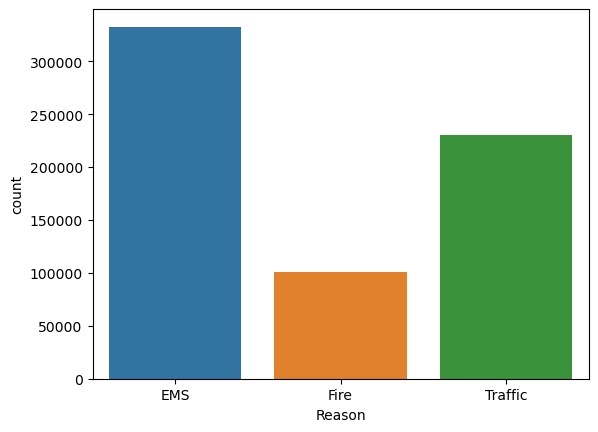

In [21]:
# Plotting the number of 911 calls made for a particular 'Reason'.

sns.countplot(x='Reason', data = df)

**The above plot indicates that the number of 911 calls for Fire emergency was least and the maximum calls were made due to some medical emergency**

___
## Breaking timestamp column to check the various attributes of time to analyse data deeper

In [22]:
type(df['timeStamp'].iloc[0])

str

In [23]:
# Converting timestamp from str into date time objects

df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [24]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [26]:
time

Timestamp('2015-10-12 17:10:00')

In [27]:
# Creating Hour,month,Day of Week columns based on timestamp column to analyse the count of 911 calls 
# at a specific interval of time

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [28]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,10,0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,10,0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:00,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,2
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:00,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,2
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:00,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,2
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:00,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,2


In [29]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [30]:
# Map strings to the day of week

df['Day of Week'] = df['Day of Week'].map(dmap)

In [31]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,Mon
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,Mon
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,10,Mon
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,10,Mon
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,10,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:00,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,Wed
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:00,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,Wed
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:00,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:00,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed


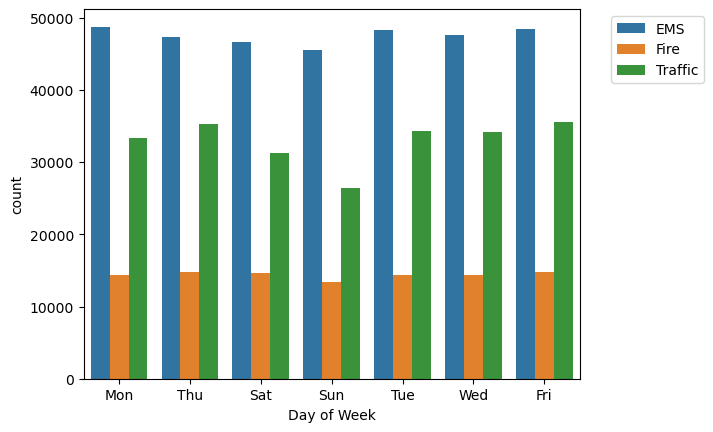

In [32]:
# Plotting the number of 911 calls made during day of week

sns.countplot(x='Day of Week', hue='Reason',data= df)
#To relocate the legend
plt.legend(bbox_to_anchor = (1.05,1),loc=2)

**The above plot indicates that the number of 911 calls were least on Sunday for Traffic and medical emergency(EMS)**

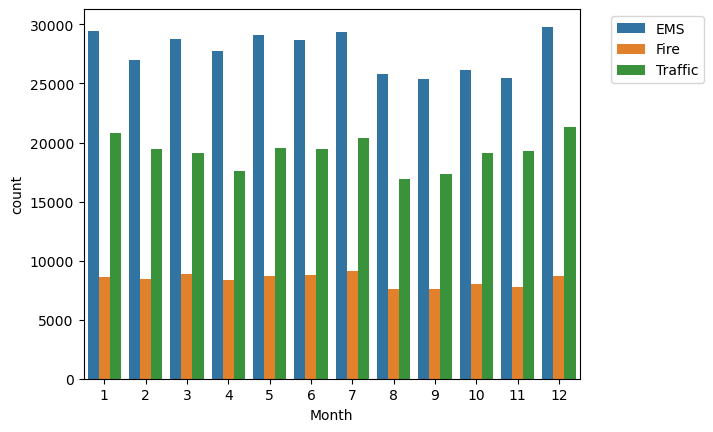

In [33]:
# Plotting the number of 911 calls made in a month

sns.countplot(x='Month',hue='Reason',data=df)
#To relocate the legend
plt.legend(bbox_to_anchor = (1.05,1),loc=2)

In [34]:
byMonth = df.groupby('Month').count()

In [35]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,58828,58828,58828,52003,58828,58828,58803,58828,58828,58828,58828,58828
2,54968,54968,54968,48443,54968,54968,54945,54968,54968,54968,54968,54968
3,56788,56788,56788,50336,56788,56788,56762,56788,56788,56788,56788,56788
4,53658,53658,53658,47247,53658,53658,53639,53658,53658,53658,53658,53658
5,57389,57389,57389,50385,57389,57389,57361,57389,57389,57389,57389,57389


<AxesSubplot:xlabel='Month'>

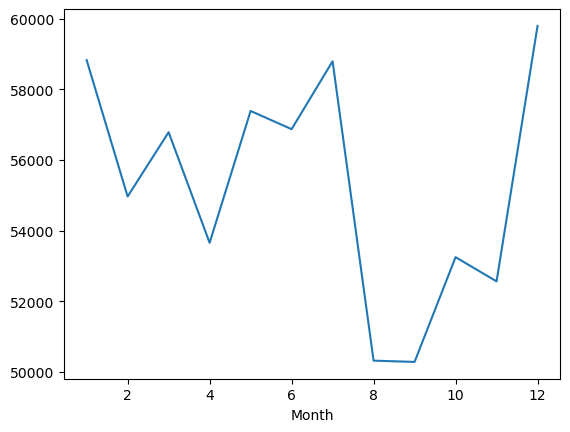

In [36]:
# Data of months from Sept to Nov are missing, so plotting the information in another way

byMonth['lat'].plot()

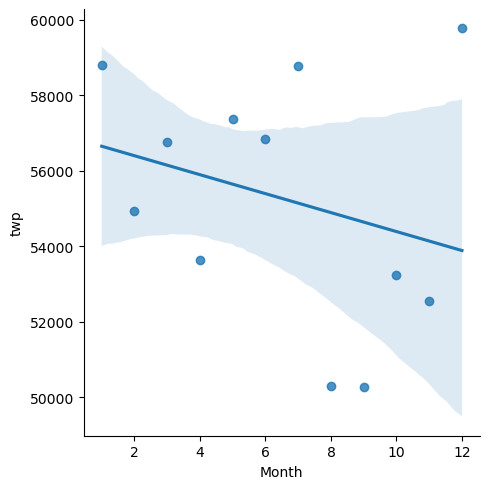

In [37]:
# Resetting index to make month as a column and creating a linear model plot to get the count with respect to month.

sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**The above lm plot shows the error in shaded area and this area is more between month 8 and 12 because we have less information between these months** 

In [38]:
# Creating Date column

df['Date']= df['timeStamp'].apply(lambda time:time.date())

In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,Mon,2015-10-12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,Mon,2015-10-12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,10,Mon,2015-10-12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,10,Mon,2015-10-12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,10,Mon,2015-10-12


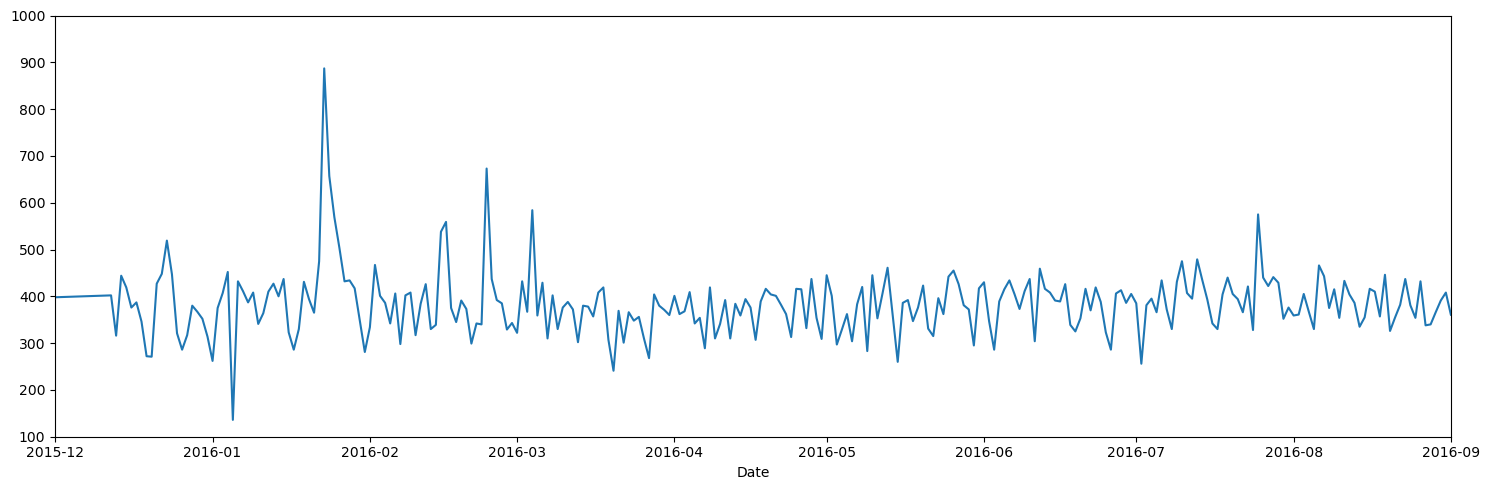

In [43]:
# Plotting Date against the count of calls. Using DateFormatter to format the date on the graph

fig, ax = plt.subplots(figsize=(15,5))
df.groupby('Date').count()['lat'].plot()
ax.set_ylim([100,1000])
ax.set_xlim(['Dec 2015','Sep 2016'])
plt.tight_layout()

**There is a significant spike during the month of February as per the above plot**

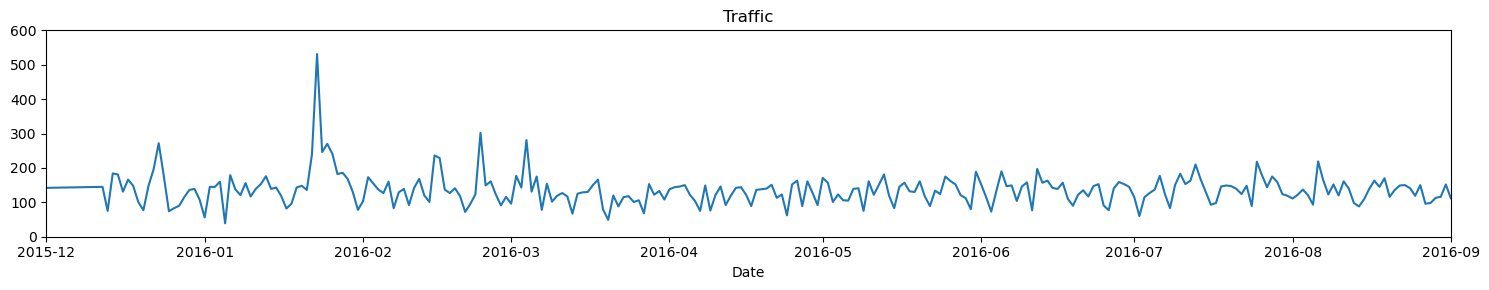

In [42]:
# Plotting Date against the count of calls , for Reason - Traffic

fig, ax = plt.subplots(figsize=(15,3))
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
ax.set_ylim([0,600])
ax.set_xlim(['Dec 2015','Sep 2016'])
plt.title('Traffic')
plt.tight_layout()

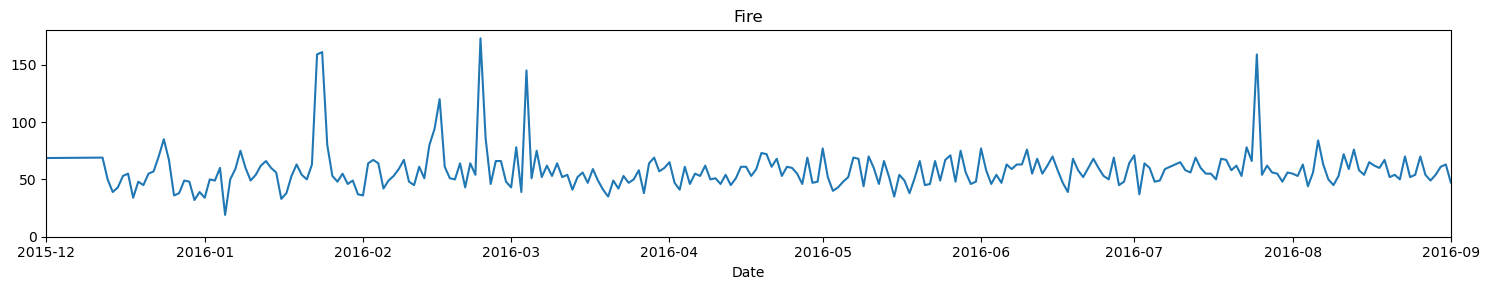

In [44]:
# Plotting Date against the count of calls , for Reason - Fire

fig, ax = plt.subplots(figsize=(15,3))
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
ax.set_ylim([0,180])
ax.set_xlim(['Dec 2015','Sep 2016'])
plt.tight_layout()

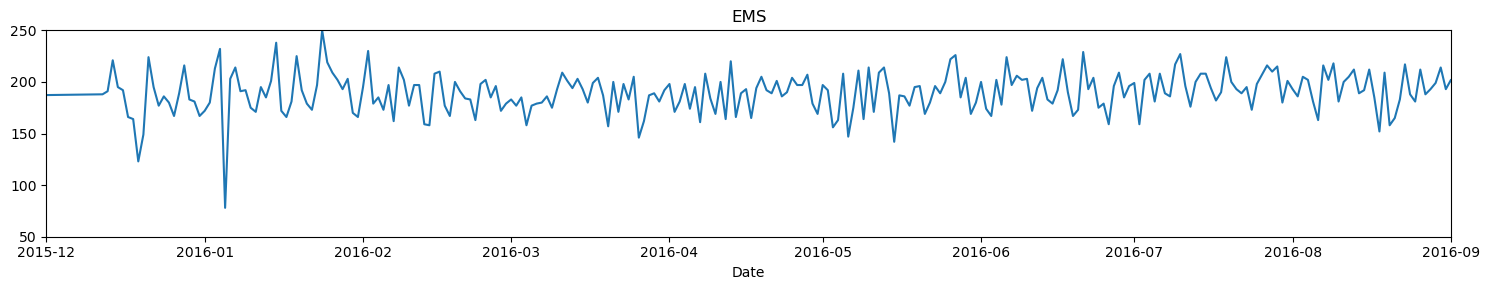

In [50]:
# Plotting Date against the count of calls , for Reason - EMS(Medical Emergency)

fig, ax = plt.subplots(figsize=(15,3))
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
ax.set_ylim([50,250])
ax.set_xlim(['Dec 2015','Sep 2016'])
plt.title('EMS')
plt.tight_layout()

In [51]:
# Creating multi level index and then unstacking one of the index into column and calculating the count against 
# the 2 indices

dayhour = df.groupby(by=['Day of Week','Hour'])['Reason'].count().unstack

In [52]:
dayhour()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,2007,1625,1485,1322,1334,1653,2557,4014,4929,5205,...,5920,6549,6557,6739,5368,4784,4164,3720,3207,2563
Mon,1913,1550,1431,1291,1342,1838,2632,4246,5227,5624,...,5769,6158,6192,6461,5417,4547,3999,3337,2785,2296
Sat,2176,1826,1657,1465,1447,1610,2144,2936,3967,4641,...,5691,5546,5740,5815,5304,4828,4055,3815,3149,2803
Sun,2280,2052,1864,1510,1436,1547,2048,3190,3678,4226,...,5038,5094,5188,5243,4713,4296,3859,3374,2759,2321
Thu,1803,1514,1437,1274,1272,1721,2670,4193,5021,5068,...,6032,6358,6238,6672,5502,4804,4109,3490,2803,2416
Tue,1886,1634,1413,1296,1335,1706,2561,4208,5340,5385,...,6138,6313,6366,6532,5480,4593,3821,3420,2773,2205
Wed,1798,1550,1366,1330,1099,1601,2607,4184,5218,5328,...,5758,6245,6516,6657,5538,4590,4072,3503,2837,2288


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

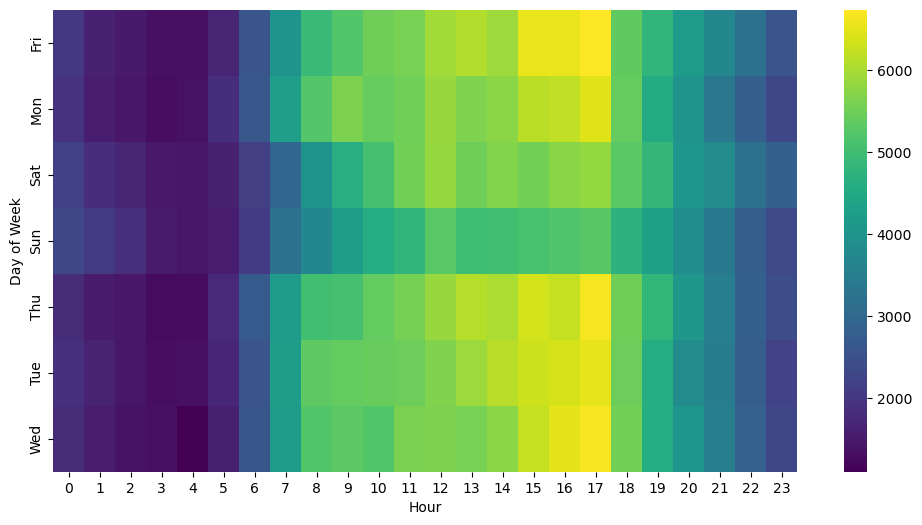

In [49]:
# Plotting a heapmap by detailing the number of calls made on a particular day at particular hour

plt.figure(figsize=(12,6))
sns.heatmap(dayhour(), cmap='viridis')

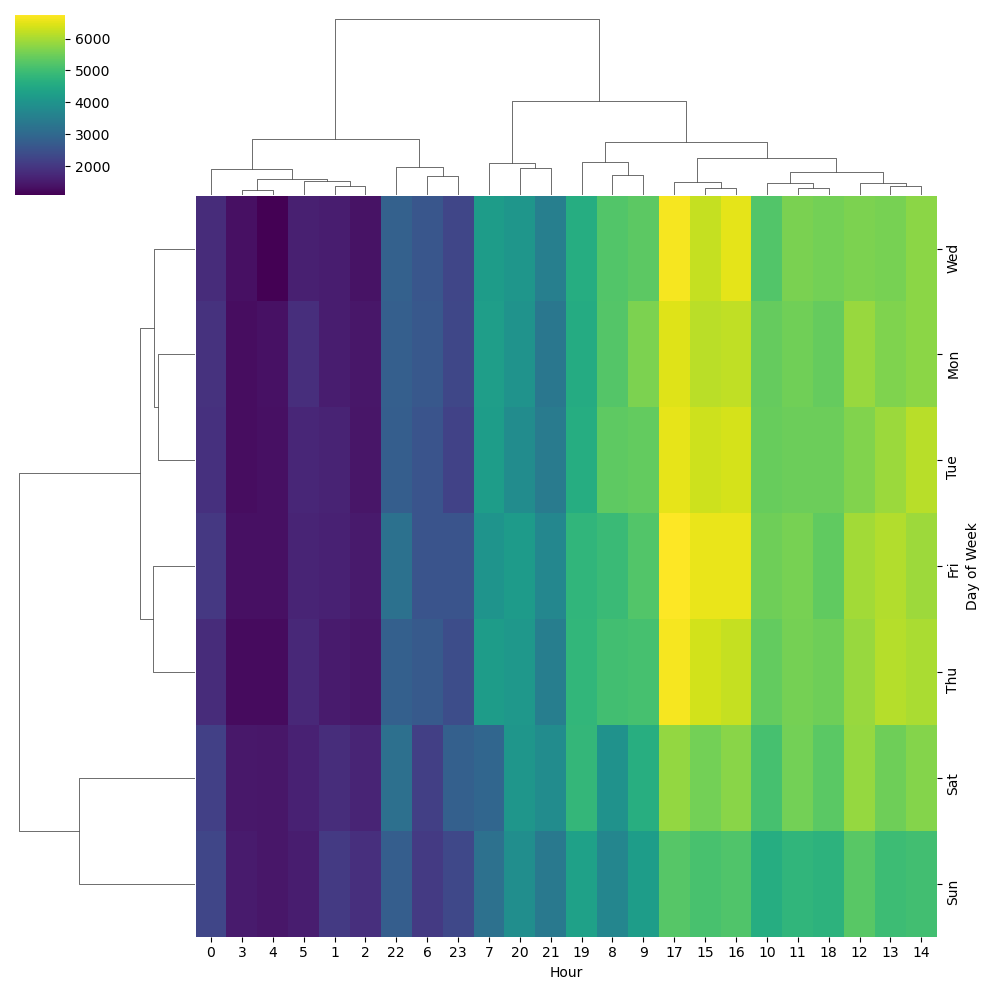

In [48]:
# Clustermap
sns.clustermap(dayhour(),cmap='viridis')

In [83]:
# Plotting a heatmap by detailing the number of calls made in a particular month on a particular day of week

dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack
dayMonth()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,8794,7905,10015,7865,8484,8435,8073,7482,8007,6970,7833,8983
Mon,8846,8189,7365,8802,7674,7826,9703,6865,7106,8323,7039,8755
Sat,7942,9224,8207,7422,7190,8214,7670,6666,7163,7141,6909,8807
Sun,7338,6909,7202,6856,7228,7640,7982,6046,7069,6984,6066,8026
Thu,8439,7783,8235,7288,8820,8688,7702,7751,7200,7484,9336,8593
Tue,8869,7415,7616,7881,8835,7932,9482,7372,6992,8323,7685,8451
Wed,8600,7543,8148,7544,9158,8139,8184,8140,6749,8026,7698,8181


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

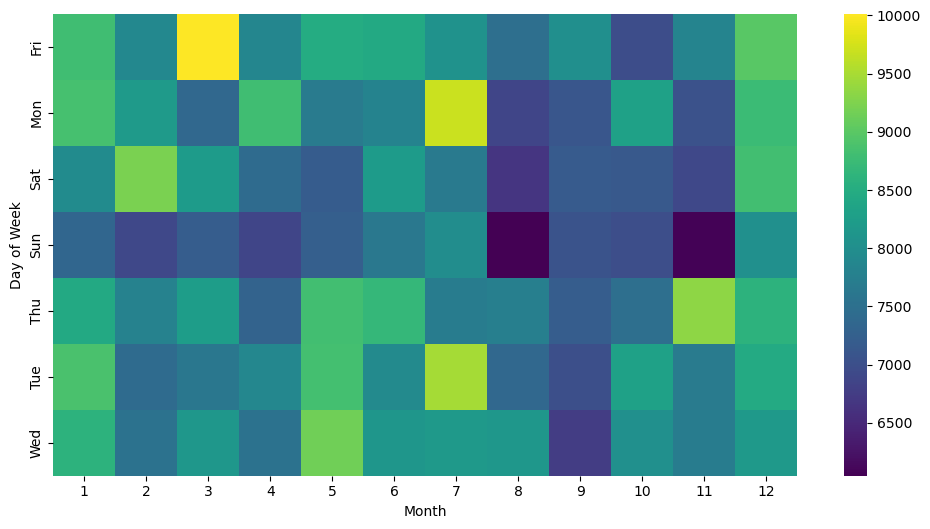

In [82]:
# Plotting a heatmap by detailing the number of calls made on a particular day in a particular month

plt.figure(figsize=(12,6))
sns.heatmap(dayMonth(), cmap='viridis')

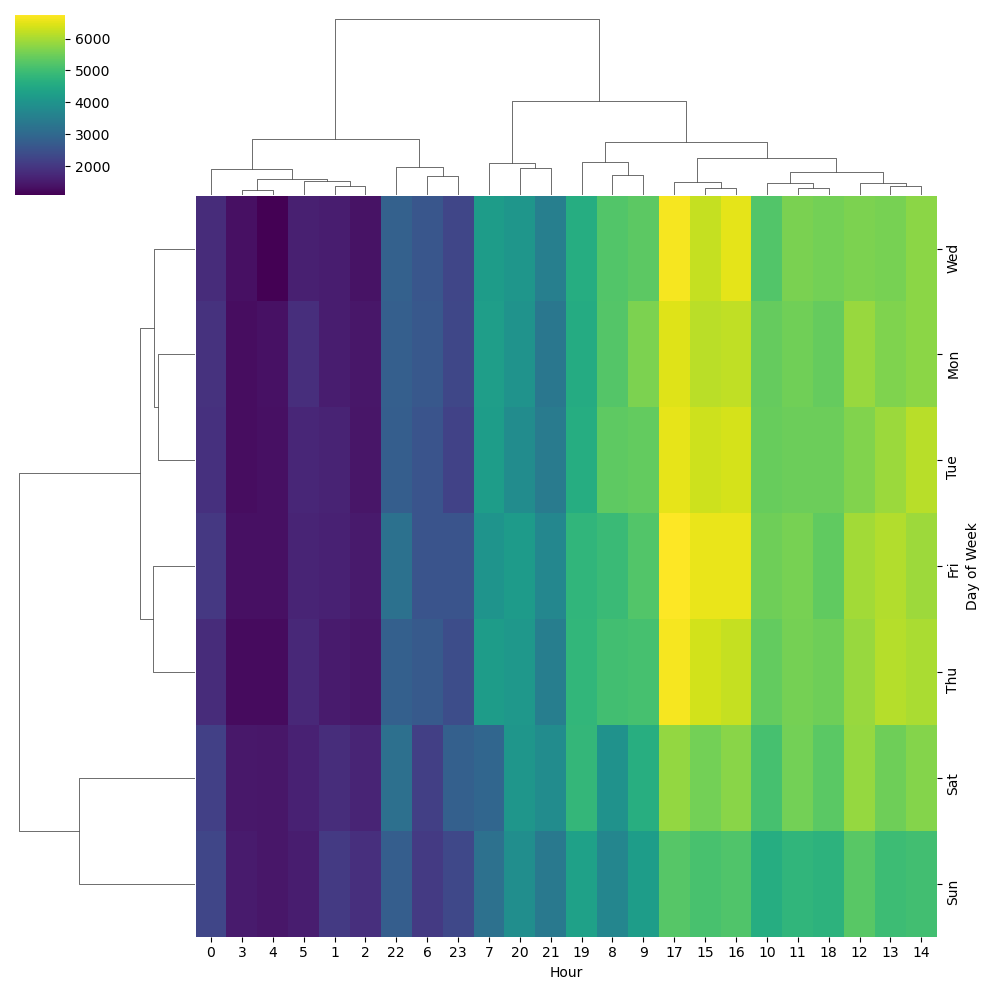

In [53]:
#clustermap
sns.clustermap(dayhour(),cmap='viridis')

# Conclusion
*The number of 911 calls were made between 8:00 to 18:00 hours maybe because people are mostly asleep during night.*


*The number of 911 calls were least on Saturdays and Sundays*

*The highest number of calls were made in the month of Jan on Saturday, Otherwise the calls were usually on the lower side on Saturdays and Sundays.*.

*The Summer months usally had more 911 calls than winter months.*

*The number of 911 calls for Fire emergency was least and the maximum calls were made due to some medical emergency*

*The number of 911 calls decreased considerably from month August to December.*